In [47]:
import os
import tensorflow as tf

In [48]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [49]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Removing corrupt data

In [50]:
import cv2
import imghdr

In [51]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [52]:
for image_class in os.listdir("classes"): 
    for image in os.listdir(os.path.join("classes", image_class)):
        image_path = os.path.join("classes", image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading data

In [53]:
import numpy as np
from matplotlib import pyplot as plt

In [54]:
dataset = tf.keras.utils.image_dataset_from_directory('classes')

Found 320 files belonging to 2 classes.


In [55]:
data_iterator = dataset.as_numpy_iterator()

In [58]:
batch = data_iterator.next()

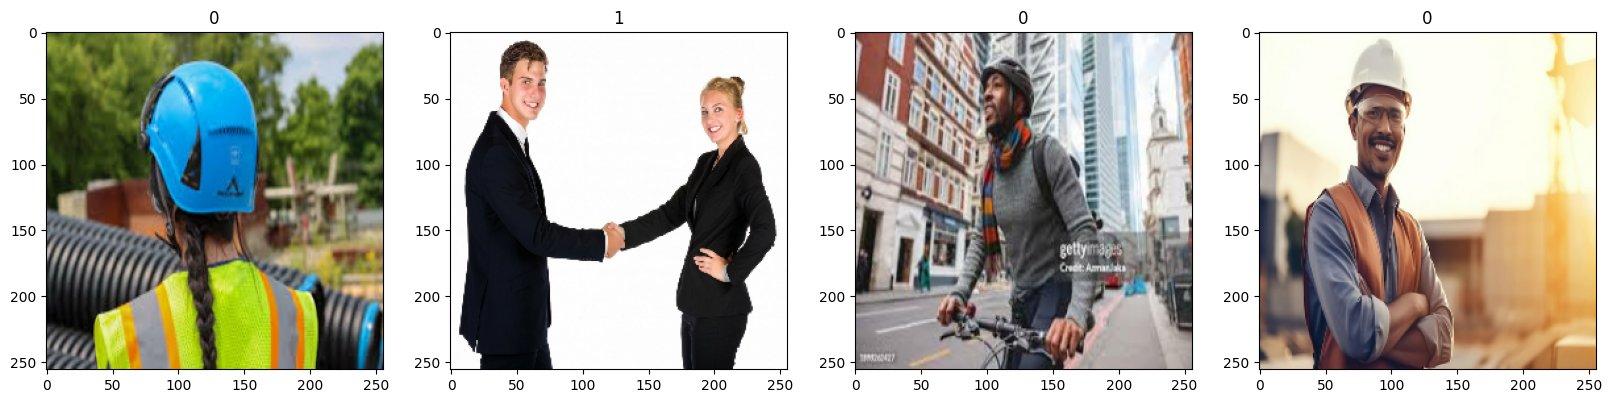

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [60]:
# Normalizing colour channels
dataset = dataset.map(lambda x,y: (x/255, y))

# Dividing into training, validation and testing

In [67]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [68]:
len(dataset)
test_size + val_size + train_size

10

In [69]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

# Creating model

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import Input

In [71]:
model = Sequential()

In [72]:
model.add(Input(shape = (256, 256, 3)))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [73]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [75]:
logdir='logs'

In [76]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - accuracy: 0.4793 - loss: 1.0396 - val_accuracy: 0.4688 - val_loss: 0.7840
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.5312 - loss: 0.7197 - val_accuracy: 0.7812 - val_loss: 0.6726
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.7028 - loss: 0.6721 - val_accuracy: 0.6875 - val_loss: 0.6395
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.6319 - loss: 0.6461 - val_accuracy: 0.6250 - val_loss: 0.6015
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.7050 - loss: 0.5627 - val_accuracy: 0.7500 - val_loss: 0.5104
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.7584 - loss: 0.5185 - val_accuracy: 0.9062 - val_loss: 0.4197
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.8832 - loss: 0.4079 - val_accuracy: 0.8906 - val_loss: 0.2991
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.9101 - loss: 0.2927 - val_accuracy: 0.9688 - val_loss: 0.1888
Epo

# Plotting performance

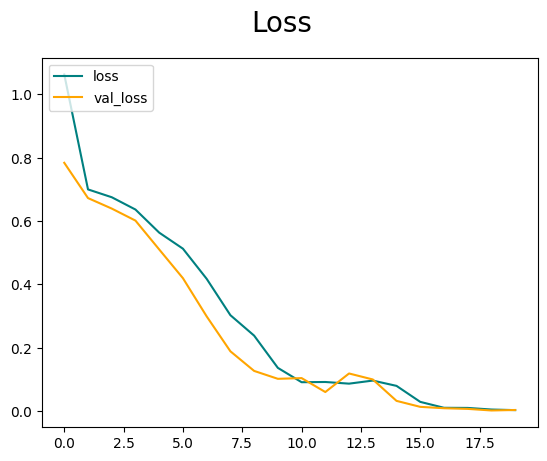

In [78]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show() 

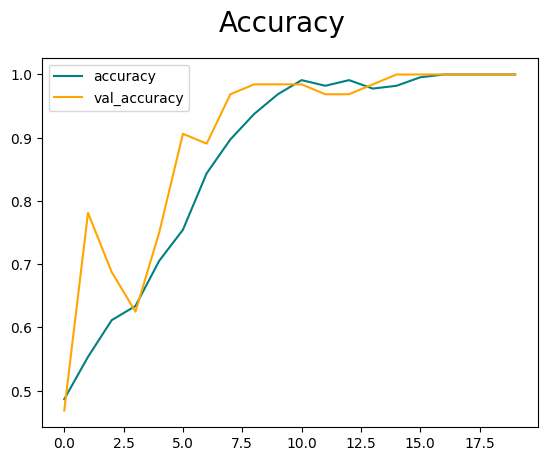

In [79]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluating

In [80]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [81]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [82]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [83]:
print(f"Precision: {precision.result()}, Recall: {recall.result()}, Accuracy: {accuracy.result()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


# Testing

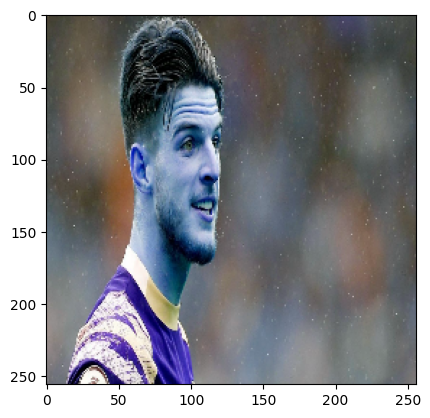

In [135]:
img = cv2.imread('nohardhattest.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [136]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [137]:
yhat

array([[0.8379872]], dtype=float32)

In [138]:

if yhat > 0.5: 
    print(f'Predicted class is no hard hat')
else:
    print(f'Predicted class is hard hat')

Predicted class is no hard hat
